In [34]:
!python -m spacy download en_core_web_sm
!python -m textblob.download_corpora

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.3 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
[nltk_data] Downloading package brown to /home/jovyan/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /home/jovyan/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package m

# CS3TM: Text Mining and Natural Language Processing

### Import Requied Libraries

In [35]:
import nltk
import time
import spacy
import os, joblib, re
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from textblob import TextBlob
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from tqdm import tqdm
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Gathering and Processing

### Get the 2 sets of Data Catigores for my Student ID

In [36]:
ng = fetch_20newsgroups()

index = 30021591
x = divmod(int(index), 4)
yourdata1 = x[1]

y = divmod(int(index), 3)
yourdata2 = y[1]

data1 = ng.target_names[x[1]]
data2 = ng.target_names[y[1]]
categories = [data1, data2]
categories

['comp.sys.ibm.pc.hardware', 'alt.atheism']

### Load data as a `DF object`

In [37]:
# Load data
ng = fetch_20newsgroups(categories=categories)

# Convert to DataFrame
data = pd.DataFrame({
    "text": ng.data,
    "category": [ng.target_names[i] for i in ng.target]
})
data

text  \
0     From: mangoe@cs.umd.edu (Charley Wingate)\nSub...   
1     From: david@ods.com (David Engel)\nSubject: Re...   
2     From: livesey@solntze.wpd.sgi.com (Jon Livesey...   
3     From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...   
4      uunet!olivea!sgigate!sgiblab!adagio.panasonic...   
...                                                 ...   
1065  From: healta@saturn.wwc.edu (Tammy R Healy)\nS...   
1066  From: Nanci Ann Miller <nm0w+@andrew.cmu.edu>\...   
1067  From: william.vaughan@uuserv.cc.utah.edu (WILL...   
1068  From: soltys@radonc.unc.edu (Mitchel Soltys)\n...   
1069  From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...   

                      category  
0                  alt.atheism  
1     comp.sys.ibm.pc.hardware  
2                  alt.atheism  
3                  alt.atheism  
4                  alt.atheism  
...                        ...  
1065               alt.atheism  
1066               alt.atheism  
1067               alt.atheism  
1068  comp.sys.ibm.pc.hardware  
1069  comp.sys.ibm.pc.hardware  

[1070 rows x 2 columns]

### Simple Pre Processing Applying NLP analysis methods and Vectorising

In [38]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = word_tokenize(text)
    cleaned_tokens = [
        lemmatizer.lemmatize(word) for word in tokens
        if word not in stop_words and len(word) > 2
    ]

    return cleaned_tokens
    
# Apply preprocessing
data["text"] = data["text"].apply(preprocess_text)

# Remove any rows where text is empty after preprocessing
data = data[data["text"].str.strip().astype(bool)]

# Encode labels
label_encoder = LabelEncoder()
data["category_label"] = label_encoder.fit_transform(data["category"])

# Prepare input and output
X = data["text"].apply(lambda x: " ".join(x))
y = data["category_label"]

# Split into train/test
text_train, text_test, category_train, category_test = train_test_split(
    X, y, test_size=0.2, random_state=4
)

# Vectorise with TF-IDF
vectoriser = TfidfVectorizer(
    max_features=100000,
    ngram_range=(1, 2),
    stop_words="english",
    sublinear_tf=True
) 

text_train_tfidf = vectoriser.fit_transform(text_train)
text_test_tfidf = vectoriser.transform(text_test)

print(f"Train {text_train_tfidf.shape}")
print(f"Test {text_test_tfidf.shape}")
data

Train (856, 83376)
Test (214, 83376)


text  \
0     [mangoecsumdedu, charley, wingate, subject, re...   
1     [davidodscom, david, engel, subject, wanted, o...   
2     [liveseysolntzewpdsgicom, jon, livesey, subjec...   
3     [idbsturztubsde, benedikt, rosenau, subject, i...   
4     [uunetoliveasgigatesgiblabadagiopanasoniccomnn...   
...                                                 ...   
1065  [healtasaturnwwcedu, tammy, healy, subject, fr...   
1066  [nanci, ann, miller, nmwandrewcmuedu, subject,...   
1067  [williamvaughanuuservccutahedu, william, danie...   
1068  [soltysradoncuncedu, mitchel, soltys, subject,...   
1069  [guydaustinibmcom, guy, dawson, subject, origi...   

                      category  category_label  
0                  alt.atheism               0  
1     comp.sys.ibm.pc.hardware               1  
2                  alt.atheism               0  
3                  alt.atheism               0  
4                  alt.atheism               0  
...                        ...             ...  
1065               alt.atheism               0  
1066               alt.atheism               0  
1067               alt.atheism               0  
1068  comp.sys.ibm.pc.hardware               1  
1069  comp.sys.ibm.pc.hardware               1  

[1070 rows x 3 columns]

# Logistic Regression Classifier

### Define the model

In [39]:
model = LogisticRegression(
    C=1.0,
    class_weight="balanced",
    solver="liblinear",
    random_state=42,
    max_iter=1000
)

### Train the model amd time it

In [40]:
start_time = time.time()
model.fit(text_train_tfidf, category_train)
end_time = time.time()

f"Trained for {end_time - start_time:.4f}s"

'Trained for 0.0141s'

### Classification Report

In [41]:
category_pred = model.predict(text_test_tfidf)
print(classification_report(category_test, category_pred, target_names=label_encoder.classes_))

                          precision    recall  f1-score   support

             alt.atheism       1.00      0.99      0.99        98
comp.sys.ibm.pc.hardware       0.99      1.00      1.00       116

                accuracy                           1.00       214
               macro avg       1.00      0.99      1.00       214
            weighted avg       1.00      1.00      1.00       214



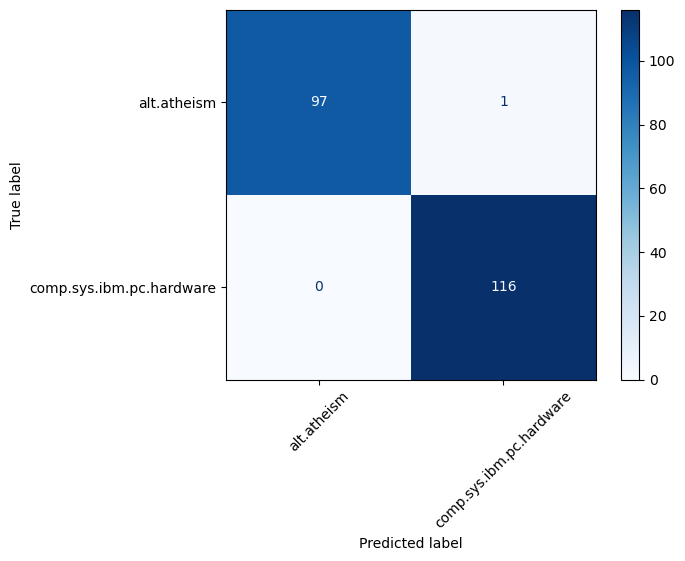

In [42]:
cm = confusion_matrix(category_test, category_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)

### Save the model

In [43]:
model_path = os.path.join("models", "logistic_regression")
os.makedirs(model_path, exist_ok=True)
joblib.dump(vectoriser, os.path.join(model_path, "vectorizer.pkl"))
joblib.dump(model, os.path.join(model_path, "model.pkl"))
joblib.dump(label_encoder, os.path.join(model_path, "label_encoder.pkl"))

['models/logistic_regression/label_encoder.pkl']

### Simple sentence classifing for out of ds chekcing

In [44]:
def classify_text(text, model_path="models/logistic_regression"):
    text_tfidf = vectoriser.transform([text])
    category_pred = model.predict(text_tfidf)
    predicted_class = label_encoder.inverse_transform(category_pred)
    return predicted_class

prompts = [
    # alt.atheism
    "the idea of god is incompatible with scientific reasoning.",
    "The Vatican City holds vast archives of religious litriture.",
    "When god parted the Red Sea, was it a miracle or just natural?",
    "Some atheists view the idea of god as a psychological construct shaped by culture.",
    # comp.sys.ibm.pc.hardware
    "My PC keeps crashing when I try to run java.",
    "Washing your GPU can drastically improve your PC's frame rate.",
    "I replaced my thermal paste with toothpaste.",
    "The BIOS update bricked my motherboard"
]

total_time = 0

for prompt in prompts:
    start_time = time.time()
    prediction = classify_text(prompt)
    end_time = time.time()
    time_taken = end_time - start_time
    total_time += time_taken

    print(f"Text: {prompt}")
    print(f"Category: {prediction[0]}")
    print(f"Time Taken: {time_taken}\n")

avr_T = total_time / len(prompts)
f"Average: {avr_T} s"

Text: the idea of god is incompatible with scientific reasoning.
Category: alt.atheism
Time Taken: 0.0007243156433105469

Text: The Vatican City holds vast archives of religious litriture.
Category: alt.atheism
Time Taken: 0.00047135353088378906

Text: When god parted the Red Sea, was it a miracle or just natural?
Category: alt.atheism
Time Taken: 0.0005946159362792969

Text: Some atheists view the idea of god as a psychological construct shaped by culture.
Category: alt.atheism
Time Taken: 0.0005271434783935547

Text: My PC keeps crashing when I try to run java.
Category: comp.sys.ibm.pc.hardware
Time Taken: 0.0004923343658447266

Text: Washing your GPU can drastically improve your PC's frame rate.
Category: comp.sys.ibm.pc.hardware
Time Taken: 0.0004439353942871094

Text: I replaced my thermal paste with toothpaste.
Category: comp.sys.ibm.pc.hardware
Time Taken: 0.00043129920959472656

Text: The BIOS update bricked my motherboard
Category: comp.sys.ibm.pc.hardware
Time Taken: 0.00043

'Average: 0.000514596700668335 s'

# Data Analysis

In [45]:
data

text  \
0     [mangoecsumdedu, charley, wingate, subject, re...   
1     [davidodscom, david, engel, subject, wanted, o...   
2     [liveseysolntzewpdsgicom, jon, livesey, subjec...   
3     [idbsturztubsde, benedikt, rosenau, subject, i...   
4     [uunetoliveasgigatesgiblabadagiopanasoniccomnn...   
...                                                 ...   
1065  [healtasaturnwwcedu, tammy, healy, subject, fr...   
1066  [nanci, ann, miller, nmwandrewcmuedu, subject,...   
1067  [williamvaughanuuservccutahedu, william, danie...   
1068  [soltysradoncuncedu, mitchel, soltys, subject,...   
1069  [guydaustinibmcom, guy, dawson, subject, origi...   

                      category  category_label  
0                  alt.atheism               0  
1     comp.sys.ibm.pc.hardware               1  
2                  alt.atheism               0  
3                  alt.atheism               0  
4                  alt.atheism               0  
...                        ...             ...  
1065               alt.atheism               0  
1066               alt.atheism               0  
1067               alt.atheism               0  
1068  comp.sys.ibm.pc.hardware               1  
1069  comp.sys.ibm.pc.hardware               1  

[1070 rows x 3 columns]

### Analyse all rows by category
- sentiment polarity
- Part of speech tagging
- lemmas

In [46]:
nlp = spacy.load("en_core_web_sm")
results_by_category = defaultdict(list)
for text, category in tqdm(zip(data["text"], data["category"]), total=len(data), desc="Analyzing"):
    doc  = nlp(" ".join(text))
    blob = TextBlob(" ".join(text))
    results_by_category[category].append({
        "sentiment":  blob.sentiment.polarity,
        "pos_tags":   [tok.pos_ for tok in doc],
        "lemmas":     [tok.lemma_ for tok in doc if tok.is_alpha and not tok.is_stop],
    })


Analyzing: 100%|██████████| 1070/1070 [00:12<00:00, 86.52it/s] 


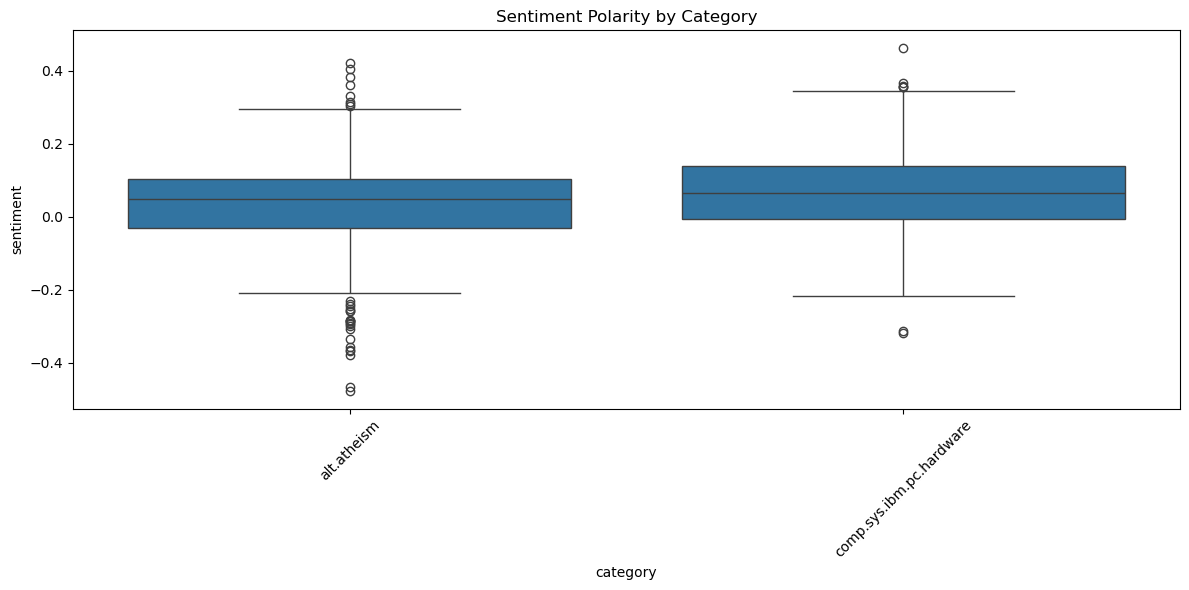

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Prepare data for plotting
plot_data = []
for category, results in results_by_category.items():
    for result in results:
        plot_data.append({"category": category, "sentiment": result["sentiment"]})
df_plot = pd.DataFrame(plot_data)

# Create a boxplot of sentiment scores by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot, x="category", y="sentiment")
plt.title("Sentiment Polarity by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Wordcloud for each catigory

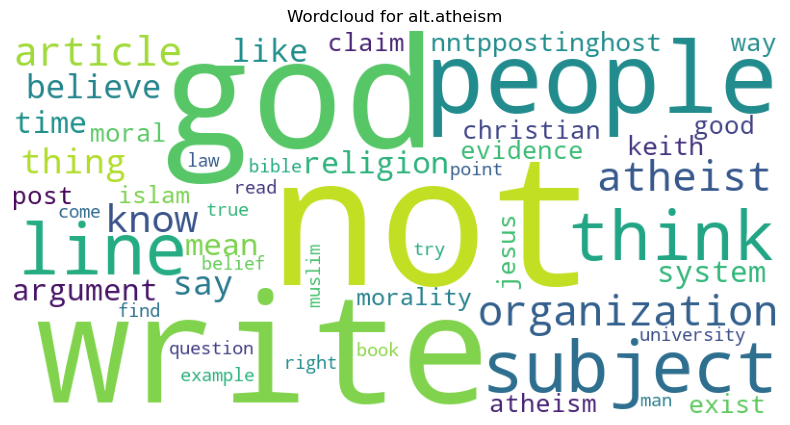

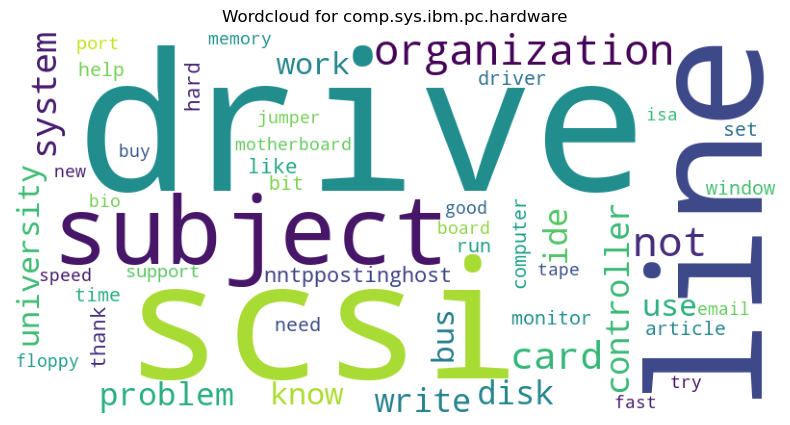

In [48]:
for category, results in results_by_category.items():
    all_lemmas = []
    for result in results:
        all_lemmas.extend(result["lemmas"])
    
    lemma_counts = Counter(all_lemmas)
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white', 
                         max_words=50, 
                         contour_width=3)
    wordcloud.generate_from_frequencies(lemma_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f'Wordcloud for {category}')
    plt.show()

### POS tag counts bar chart

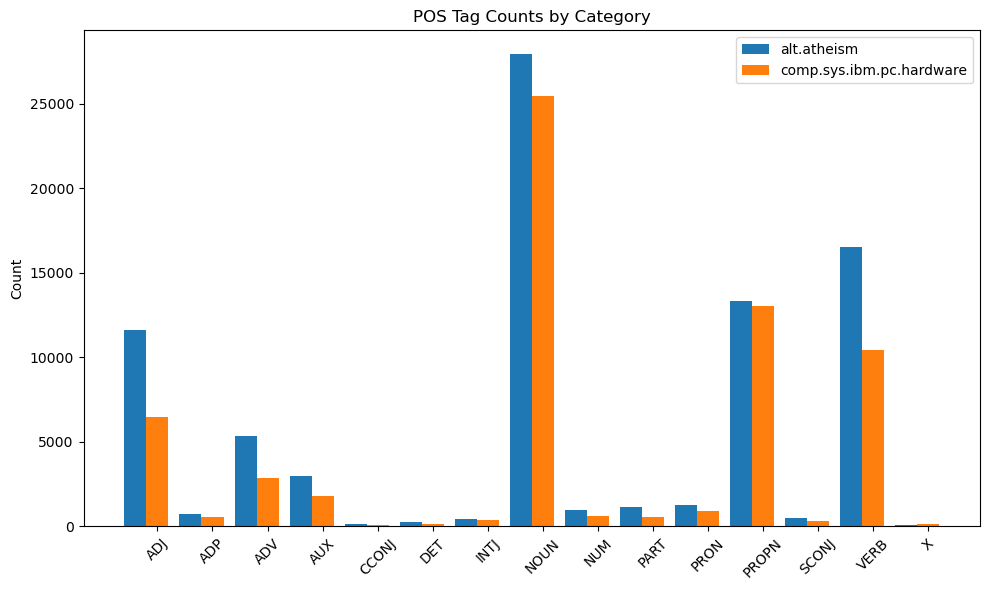

In [49]:
pos_records = []
for cat, lst in results_by_category.items():
    cnt = Counter(pos for a in lst for pos in a["pos_tags"])
    for pos, n in cnt.items():
        pos_records.append({"Category": cat, "POS": pos, "Count": n})
pos_df = pd.DataFrame(pos_records)

plt.figure(figsize=(10,6))
pos_tags = sorted(pos_df["POS"].unique())
width = 0.8 / len(pos_df["Category"].unique())
x     = range(len(pos_tags))

for i, cat in enumerate(pos_df["Category"].unique()):
    counts = [pos_df[(pos_df["Category"]==cat)&(pos_df["POS"]==pt)]["Count"].sum()
              for pt in pos_tags]
    plt.bar([xi + i*width for xi in x], counts, width, label=cat)

plt.xticks([xi + width*(len(pos_df["Category"].unique())/2) for xi in x], pos_tags, rotation=45)
plt.title("POS Tag Counts by Category")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

### Top 10 lemmas per category

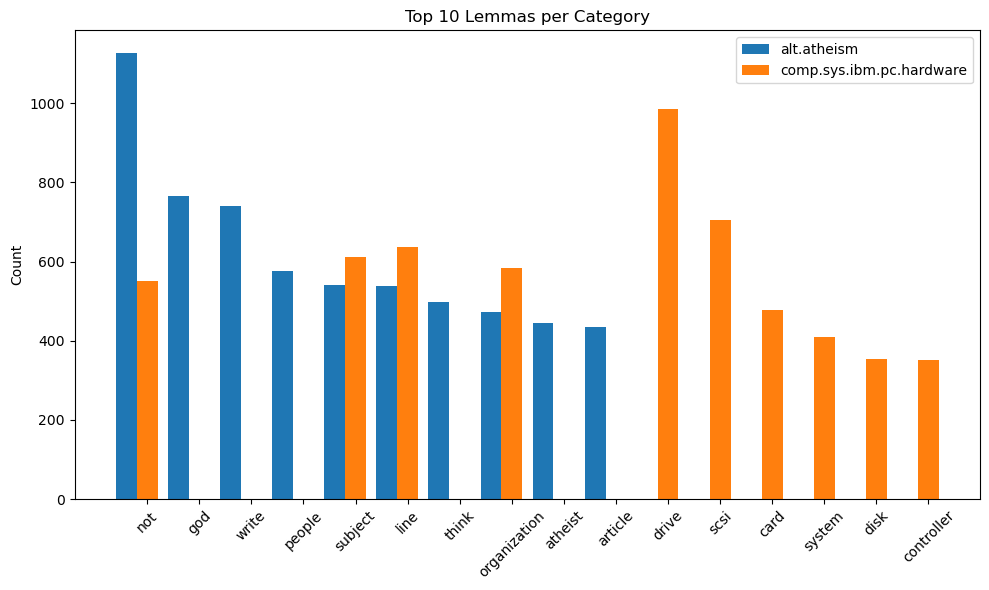

In [50]:
lemma_records = []
for cat, lst in results_by_category.items():
    cnt = Counter(lemma for a in lst for lemma in a["lemmas"])
    for lemma, n in cnt.most_common(10):
        lemma_records.append({"Category": cat, "Lemma": lemma, "Count": n})
lemma_df = pd.DataFrame(lemma_records)

plt.figure(figsize=(10,6))
lemmas = lemma_df["Lemma"].unique()
x      = range(len(lemmas))

for i, cat in enumerate(lemma_df["Category"].unique()):
    counts = [lemma_df[(lemma_df["Category"]==cat)&(lemma_df["Lemma"]==lm)]["Count"].sum()
              for lm in lemmas]
    plt.bar([xi + i*width for xi in x], counts, width, label=cat)

plt.xticks([xi + width*(len(lemma_df["Category"].unique())/2) for xi in x], lemmas, rotation=45)
plt.title("Top 10 Lemmas per Category")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()